In [73]:
# import the required libraries 


In [120]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
import netCDF4

In [121]:
#import netCDF4
#file2read = netCDF4.Dataset('Downloads/g4.timeAvgMap.M2TMNXLND_5_12_4_GWETTOP.20160501-20211031.74W_43N_73W_44N.nc','r')
#var1 = file2read.variables['var1']  # access a variable in the file

In [122]:
import netCDF4
# importing Total Precipitation data downloaded as netCDF4 data from NASA Giovanni to our notebook environment.

file2read_1 = netCDF4.Dataset('Downloads/g4.timeAvgMap.M2TMNXFLX_5_12_4_PRECTOT.20160501-20211031.180W_90S_180E_90N.nc','r')
#var1 = file2read.variables['var1']  # access a variable in the file

In [123]:
file2read_1.variables.keys()

dict_keys(['M2TMNXFLX_5_12_4_PRECTOT', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'shape_mask'])

In [78]:
# Now we import the soil moisture data downloaded as netCDF4 data from NASA Giovanni to our notebook environment.


In [124]:
import netCDF4
file2read_2 = netCDF4.Dataset('Downloads/g4.timeAvgMap.M2TMNXLND_5_12_4_GWETTOP.20160501-20211031.180W_90S_180E_90N.nc','r')
#var1 = file2read.variables['var1']  # access a variable in the file

In [125]:
file2read_2.variables.keys()

dict_keys(['M2TMNXLND_5_12_4_GWETTOP', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'shape_mask'])

In [9]:
#  Soil Temperature
# Now we import the soil temperature data downloaded as netCDF4 data from NASA Giovanni to our notebook environment.

In [126]:
import netCDF4
file2read_3 = netCDF4.Dataset('Downloads/g4.timeAvgMap.M2TMNXLND_5_12_4_TSOIL1.20160501-20211031.180W_90S_180E_90N.nc','r')
#var1 = file2read.variables['var1']  # access a variable in the file

In [127]:
file2read_3.variables.keys()

dict_keys(['M2TMNXLND_5_12_4_TSOIL1', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'shape_mask'])

In [83]:
#file2read.variables.keys()

In [7]:
#precip = file2read.variables['M2TMNXFLX_5_12_4_PRECTOT']  # access a variable in the file

In [8]:
#precip

<class 'netCDF4._netCDF4.Variable'>
float32 M2TMNXFLX_5_12_4_PRECTOT(lat, lon)
    _FillValue: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    fullnamepath: /PRECTOT
    missing_value: 1000000000000000.0
    origname: PRECTOT
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    standard_name: precipitation
    quantity_type: Precipitation
    product_short_name: M2TMNXFLX
    product_version: 5.12.4
    long_name: Total surface precipitation
    coordinates: lat lon
    units: kg m-2 s-1
    cell_methods: time: mean
    latitude_resolution: 0.5
    longitude_resolution: 0.625
unlimited dimensions: 
current shape = (2, 1)
filling on

In [128]:
# Preciipitation total
PRECTOT = file2read_1.variables['M2TMNXFLX_5_12_4_PRECTOT']  # access a variable in the file

In [129]:
# soil moisture
GWETTOP = file2read_2.variables['M2TMNXLND_5_12_4_GWETTOP']  # access a variable in the file

In [130]:
# soil temperature
TSOIL1 = file2read_3.variables['M2TMNXLND_5_12_4_TSOIL1']  # access a variable in the file

masked_array(
  data=[[4.7525606e-05],
        [4.8260659e-05]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [131]:
import numpy as np
PRECTOTvalue = PRECTOT[:]


In [132]:
PRECTOTvalue = np.ravel(PRECTOTvalue)
PRECTOTvalue = np.expand_dims(PRECTOTvalue, axis = 1)

In [133]:
import numpy as np
GWETTOPvalue = GWETTOP[:]


In [134]:
GWETTOPvalue = np.ravel(GWETTOPvalue)
GWETTOPvalue = np.expand_dims(GWETTOPvalue, axis = 1)

In [135]:
import numpy as np
TSOIL1value = TSOIL1[:]


In [136]:
TSOIL1value = np.ravel(TSOIL1value)
TSOIL1value = np.expand_dims(TSOIL1value, axis = 1)

In [137]:
import numpy as np

In [138]:
data = np.concatenate((PRECTOTvalue,GWETTOPvalue,TSOIL1value),axis=1)
# rows, and 3 coloumns

In [139]:
#data
data = np.ma.getdata(data)

In [140]:
#value
data

array([[1.e+15, 1.e+15, 1.e+15],
       [1.e+15, 1.e+15, 1.e+15],
       [1.e+15, 1.e+15, 1.e+15],
       ...,
       [1.e+15, 1.e+15, 1.e+15],
       [1.e+15, 1.e+15, 1.e+15],
       [1.e+15, 1.e+15, 1.e+15]], dtype=float32)

In [141]:

data = data[data[:,-1] < 1000]

In [142]:
print(np.shape(data))
# 261 rows means 261 data pints, two features and one target variable (label) 
# labels are: "1" and "0" 
# "1" above freezing
# "0" below freezing

(261, 3)


In [143]:
x = data[:,0:2]
y = data[:,2]

In [144]:
x

array([[1.76773192e-05, 5.10758042e-01],
       [1.91692416e-05, 3.99134606e-01],
       [2.41468169e-05, 3.86678219e-01],
       [2.70575183e-05, 6.45562351e-01],
       [1.79484014e-05, 4.44676876e-01],
       [1.97909230e-05, 4.04459953e-01],
       [2.04177395e-05, 3.69230926e-01],
       [2.34645468e-05, 3.67150068e-01],
       [1.97716618e-05, 4.56732571e-01],
       [2.21577884e-05, 4.01841551e-01],
       [2.32085076e-05, 3.36950600e-01],
       [2.44258281e-05, 3.52499843e-01],
       [1.67435301e-05, 3.90118062e-01],
       [2.02477459e-05, 4.84016180e-01],
       [2.46245709e-05, 4.92726892e-01],
       [2.68115637e-05, 5.16360581e-01],
       [2.73668393e-05, 5.88134944e-01],
       [2.62365647e-05, 6.82895064e-01],
       [1.66604077e-05, 4.73988622e-01],
       [1.91290383e-05, 5.13499796e-01],
       [2.39861693e-05, 5.05626023e-01],
       [2.81657667e-05, 5.23998320e-01],
       [2.88870724e-05, 6.01948977e-01],
       [3.04247915e-05, 7.27454305e-01],
       [3.004649

In [145]:
y

array([299.03296, 298.92065, 299.0199 , 298.51028, 299.119  , 298.91068,
       298.7218 , 298.62695, 298.88602, 298.2073 , 298.2492 , 298.04547,
       298.70038, 298.30313, 297.47998, 297.4213 , 297.62793, 297.51913,
       298.23535, 298.08704, 297.3843 , 296.97824, 297.18625, 296.8405 ,
       296.37766, 297.44757, 297.82904, 297.58304, 297.1675 , 296.5411 ,
       296.6273 , 296.39597, 296.24225, 296.1452 , 295.8209 , 296.78476,
       297.13028, 297.101  , 296.74207, 296.28168, 295.9338 , 296.047  ,
       295.85703, 295.63522, 295.3535 , 295.28748, 295.9509 , 295.63763,
       295.43076, 295.6454 , 295.2068 , 296.2219 , 296.66104, 296.0548 ,
       295.37076, 295.2348 , 295.2059 , 295.15714, 295.6931 , 295.29666,
       295.1794 , 295.08163, 295.25702, 295.22742, 295.24542, 294.31882,
       294.10037, 293.46954, 294.26303, 295.6294 , 296.30756, 295.73563,
       294.54312, 293.715  , 293.67685, 293.9142 , 294.5133 , 295.07803,
       294.81494, 294.65488, 294.56522, 294.4759 , 

In [36]:
# convertion of Temperature from Kelvin values to HOT , COLD

In [146]:
# for the simplicity, we label the temperature above 71 'F ( over 295 Kelvin) as Hot == 1
# and the values below that as Cold == 0

# 295 Kelvin is 71.33 Fahrenheit (~ 71 'F)
y = np.where(y > 295, 1, 0)

In [147]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
# tain and test data split
# train_features, train_labels

In [148]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels =train_test_split(x,y, test_size = 0.2, random_state = 42)
# X_train, Y_Test, y_train, Y_Test =

In [149]:
test_features

array([[2.97957740e-05, 5.35953164e-01],
       [4.29595093e-05, 6.55136108e-01],
       [1.43540401e-05, 3.63492250e-01],
       [2.60534307e-05, 5.88739455e-01],
       [2.78570533e-05, 5.41794777e-01],
       [1.57149989e-05, 3.73021334e-01],
       [2.17253655e-05, 4.28061068e-01],
       [1.26955129e-05, 2.80674100e-01],
       [2.21577884e-05, 4.01841551e-01],
       [1.49241250e-05, 3.63729209e-01],
       [3.00464908e-05, 9.49010491e-01],
       [1.22535812e-05, 3.47956866e-01],
       [3.17313097e-05, 6.24804556e-01],
       [1.80966927e-05, 3.94594908e-01],
       [1.51146278e-05, 3.65915060e-01],
       [2.40524023e-05, 4.46136355e-01],
       [3.71957576e-05, 5.98605633e-01],
       [2.04177395e-05, 3.69230926e-01],
       [3.54188087e-05, 4.78450805e-01],
       [4.37378658e-05, 6.24461651e-01],
       [3.58946054e-05, 8.22847664e-01],
       [3.98480734e-05, 6.25837564e-01],
       [1.91290383e-05, 5.13499796e-01],
       [3.82780236e-05, 6.80456281e-01],
       [1.866898

In [151]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
# Scale data


scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)



In [152]:
test_features

array([[ 3.67185920e-01,  3.08868557e-01],
       [ 1.47804785e+00,  1.10764527e+00],
       [-9.35911894e-01, -8.46982777e-01],
       [ 5.13768494e-02,  6.62647843e-01],
       [ 2.03581020e-01,  3.48019660e-01],
       [-8.21063280e-01, -7.83117831e-01],
       [-3.13860148e-01, -4.14235711e-01],
       [-1.07587183e+00, -1.40203881e+00],
       [-2.77368814e-01, -5.89961708e-01],
       [-8.87803555e-01, -8.45394671e-01],
       [ 3.88343424e-01,  3.07722259e+00],
       [-1.11316550e+00, -9.51102555e-01],
       [ 5.30521989e-01,  9.04359996e-01],
       [-6.20076776e-01, -6.38529480e-01],
       [-8.71727407e-01, -8.30744863e-01],
       [-1.17486037e-01, -2.93093204e-01],
       [ 9.91656125e-01,  7.28772044e-01],
       [-4.24208134e-01, -8.08521569e-01],
       [ 8.41702819e-01, -7.65183270e-02],
       [ 1.54373181e+00,  9.02061820e-01],
       [ 8.81854415e-01,  2.23166585e+00],
       [ 1.21547985e+00,  9.11283314e-01],
       [-5.32959104e-01,  1.58383727e-01],
       [ 1.

In [57]:
# Classical Machine Learning: SVM

In [153]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [154]:
# Linear
svm_model = SVC(kernel = 'linear', C=1)
svm_model.fit(train_features, train_labels)

SVC(C=1, kernel='linear')

In [155]:
# Predict
predictions = svm_model.predict(test_features)

In [156]:
# accuaracy
accuracy = accuracy_score(test_labels,predictions)

In [157]:
print(accuracy)

0.8113207547169812


In [ ]:
# Regular Model QSVM start here

In [50]:
# Quantum model


In [158]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# number of quibts are equal to the number of features. 
# feature_dimension = number of features
# we have two features : PRECTOTvalue,   GWETTOPvalue
# 

# adhoc_dimension = feature dimension
adhoc_dimension = 2
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")


sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

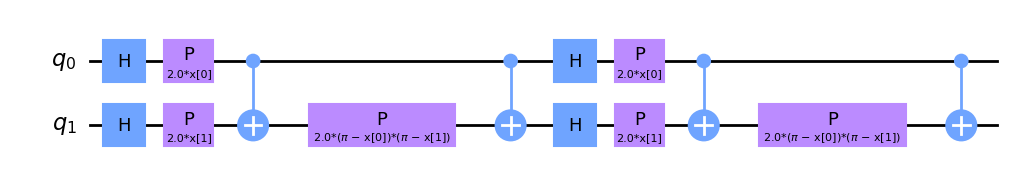

In [159]:
adhoc_feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

In [160]:
import time

In [161]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=adhoc_kernel)

start_score = time.time()

qsvc.fit(train_features, train_labels)

end_score = time.time()
score_time = end_score - start_score 

print(f" time elapse for fitting: {score_time}")

qsvc_score = qsvc.score(test_features, test_labels)

#print(f"QSVC classification test score: {qsvc_score}")

 time elapse for fitting: 54.414567947387695


In [162]:
print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.7547169811320755


In [163]:
import time

In [164]:
start_score = time.time()
qsvc_score = qsvc.score(test_features, test_labels)
end_score = time.time()
score_time = end_score - start_score 

print(f" time elapse for scoring: {score_time}")
print(f"QSVC classification test score: {qsvc_score}")

 time elapse for scoring: 28.058673858642578
QSVC classification test score: 0.7547169811320755


In [166]:
print(test_labels)

[1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [167]:
print(test_features)

[[ 3.67185920e-01  3.08868557e-01]
 [ 1.47804785e+00  1.10764527e+00]
 [-9.35911894e-01 -8.46982777e-01]
 [ 5.13768494e-02  6.62647843e-01]
 [ 2.03581020e-01  3.48019660e-01]
 [-8.21063280e-01 -7.83117831e-01]
 [-3.13860148e-01 -4.14235711e-01]
 [-1.07587183e+00 -1.40203881e+00]
 [-2.77368814e-01 -5.89961708e-01]
 [-8.87803555e-01 -8.45394671e-01]
 [ 3.88343424e-01  3.07722259e+00]
 [-1.11316550e+00 -9.51102555e-01]
 [ 5.30521989e-01  9.04359996e-01]
 [-6.20076776e-01 -6.38529480e-01]
 [-8.71727407e-01 -8.30744863e-01]
 [-1.17486037e-01 -2.93093204e-01]
 [ 9.91656125e-01  7.28772044e-01]
 [-4.24208134e-01 -8.08521569e-01]
 [ 8.41702819e-01 -7.65183270e-02]
 [ 1.54373181e+00  9.02061820e-01]
 [ 8.81854415e-01  2.23166585e+00]
 [ 1.21547985e+00  9.11283314e-01]
 [-5.32959104e-01  1.58383727e-01]
 [ 1.08298647e+00  1.27734375e+00]
 [-5.71782112e-01 -6.97651625e-01]
 [ 7.49009132e-01  1.01678145e+00]
 [ 5.55865645e-01 -7.57145807e-02]
 [ 7.52343476e-01  2.95537496e+00]
 [-1.02517545e-01 -4

In [ ]:
# Regular QSVM ends here
